In [2]:
from pylab import *
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyfits


from matplotlib.ticker import NullFormatter  # useful for `logit` scale
from astropy.time import Time

from astropy.stats import LombScargle
plt.style.use('seaborn-whitegrid')

%matplotlib inline
%config InlineBackend.figure_format='svg'
#%config InlineBackend.figure_format='retina'

In [ ]:
Name	Table Head	Description	Unit	UCD
DEC	Delta (ICRS)	Declination (ICRS decimal)	deg	pos.eq.dec
designation	WISE id	Sexagesimal, equatorial position-based source name in the form: hhmmss.ss+ddmmss.s. The full naming convention for WISE All-Sky Release Catalog sources has the form 'WISE Jhhmmss.ss+ddmmss.s,', where WISE is not given in this column.	N/A	meta.id;meta.main
hscs_pos	Position/Name	Coordinates (as h m s, d m s or decimal degrees), or SIMBAD-resolvable object	N/A	N/A
hscs_sr	Search radius	Search radius in arcminutes	N/A	N/A
MAXREC	Match limit	Maximum number of records returned. Pass 0 to retrieve service parameters.	N/A	N/A
RA	Alpha (ICRS)	Right Ascension (ICRS decimal)	deg	pos.eq.ra
RESPONSEFORMAT	Output Format	File format requested for output.	N/A	meta.code.mime
SR	Search Radius	Search radius	deg	N/A
VERB	Verbosity	Exhaustiveness of column selection. VERB=1 only returns the most important columns, VERB=2 selects the columns deemed useful to the average user, VERB=3 returns a table with all available columns.	N/A	N/A
w1mpro	Mag. 3.4µm	Magnitude at 3.4µm measured with profile-fitting photometry, or the magnitude of the 95% confidence brightness upper limit if the 3.4µm flux measurement has SNR<2. This column is null if the source is nominally detected in 3.4µm, but no useful brightness estimate could be made.	mag	phot.mag;em.IR.3-4um
w2mpro	Mag. 4.6µm	Magnitude at 4.6µm measured with profile-fitting photometry, or the magnitude of the 95% confidence brightness upper limit if the 4.6µm flux measurement has SNR<2. This column is null if the source is nominally detected in 4.6µm, but no useful brightness estimate could be made.	mag	phot.mag;em.IR.4-8um
w3mpro	Mag. 12µm	Magnitude at 12µm measured with profile-fitting photometry, or the magnitude of the 95% confidence brightness upper limit if the 12µm flux measurement has SNR<2. This column is null if the source is nominally detected in 12µm, but no useful brightness estimate could be made.	mag	phot.mag;em.IR.8-15um
w4mpro	Mag. 22µm	Magnitude at 22µm measured with profile-fitting photometry, or the magnitude of the 95% confidence brightness upper limit if the 22µm flux measurement has SNR<2. This column is null if the source is nominally detected in 22µm, but no useful brightness estimate could be made.	mag	phot.mag;em.IR.15-30um

mjd w1mpro_ep w1sigmpro_ep
mjd w2mpro_ep w2sigmpro_ep
mjd w3mpro_ep w3sigmpro_ep
mjd w4mpro_ep w4sigmpro_ep
mjd w1mpro w1sigmpro
mjd w2mpro w2sigmpro
mjd w1mpro_allwise w1sigmpro_allwise
mjd w2mpro_allwise w2sigmpro_allwise
mjd w3mpro_allwise w3sigmpro_allwise
mjd w4mpro_allwise w4sigmpro_allwise


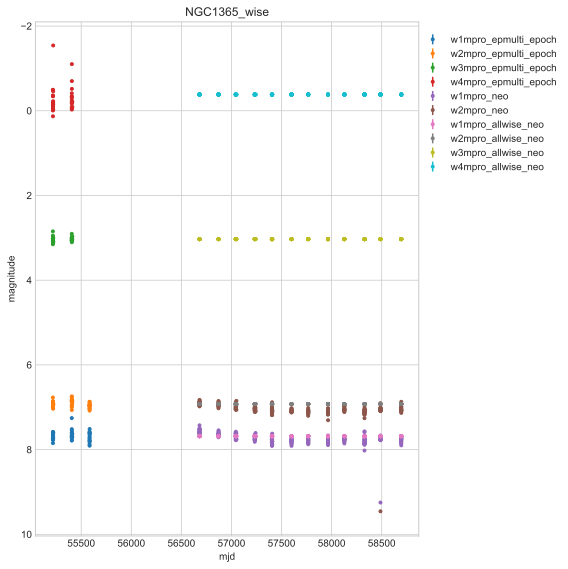

In [35]:
data_allwise_epoch=pd.read_csv('/Users/brettlv/Downloads/NGC1365/NGC1365multiepoch.csv')
data_neowise=pd.read_csv('/Users/brettlv/Downloads/NGC1365/NGC1365_neowise.csv')
fig, axs = plt.subplots(1, 1,figsize=(8,8))
axs.set_title('NGC1365_wise')

for i in range(4):
    name_mjd='mjd'
    name_band=data_allwise_epoch.columns[i*3+8]
    name_err=data_allwise_epoch.columns[i*3+9]
    print(name_mjd,name_band,name_err)
    data_band=data_allwise_epoch[data_allwise_epoch[name_mjd].notnull()]  
    axs.errorbar(data_band[name_mjd],data_band[name_band],data_band[name_err],fmt='.',label=name_band+'multi_epoch')
    mag_wise_data=pd.DataFrame({'t':data_band[name_mjd],'flux':data_band[name_band],'err':data_band[name_err]},index=None,columns=['t','flux','err'])
    mag_wise_data.to_csv('/Users/brettlv/Downloads/NGC1365/mag_wise_multi_%s_data.csv'%name_band,index=False,header=False)

    dcf_wise_data=pd.DataFrame({'t':data_band[name_mjd],'flux':(-48.6-data_band[name_band])/2.5,'err':data_band[name_err]/2.5},index=None,columns=['t','flux','err'])
    dcf_wise_data.to_csv('/Users/brettlv/Downloads/NGC1365/dcf_wise_multi_%s_data.csv'%name_band,index=False,header=False)


data_neowise_select=data_neowise.loc[:, ['w1mpro', 'w1sigmpro',
         'w2mpro', 'w2sigmpro','w1mpro_allwise', 'w1sigmpro_allwise', 'w2mpro_allwise',
        'w2sigmpro_allwise', 'w3mpro_allwise', 'w3sigmpro_allwise',
        'w4mpro_allwise', 'w4sigmpro_allwise']]

for i in range(6):
    name_mjd='mjd'
    name_band=data_neowise_select.columns[i*2]
    name_err=data_neowise_select.columns[i*2+1]
    print(name_mjd,name_band,name_err)
    axs.errorbar(data_neowise[name_mjd],data_neowise_select[name_band],data_neowise_select[name_err],fmt='.',label=name_band+'_neo')
    axs.set_ylabel('magnitude')  
    mag_neowise_data=pd.DataFrame({'t':data_neowise[name_mjd],'flux':data_neowise[name_band],'err':data_neowise[name_err]},index=None,columns=['t','flux','err'])
    mag_neowise_data.to_csv('/Users/brettlv/Downloads/NGC1365/mag_neowise_%s_data.csv'%name_band,index=False,header=False)
    
    dcf_neowise_data=pd.DataFrame({'t':data_neowise[name_mjd],'flux':(-48.5-data_neowise[name_band])/2.5,'err':data_neowise[name_err]/2.5},index=None,columns=['t','flux','err'])
    dcf_neowise_data.to_csv('/Users/brettlv/Downloads/NGC1365/dcf_neowise_%s_data.csv'%name_band,index=False,header=False)

axs.legend(loc=[1.0,0.7])
axs.invert_yaxis()
  
axs.set_ylabel('magnitude')
axs.set_xlabel('mjd')
plt.tight_layout()
plt.savefig('/Users/brettlv/Downloads/NGC1365/wise_lc.png',dpi=400)

mjd w1mpro_ep w1sigmpro_ep
mjd w2mpro_ep w2sigmpro_ep
mjd w3mpro_ep w3sigmpro_ep
mjd w4mpro_ep w4sigmpro_ep


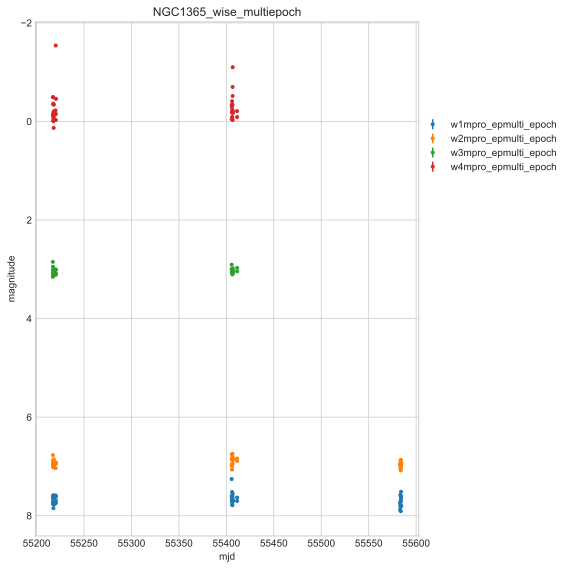

In [36]:
fig, axs = plt.subplots(1, 1,figsize=(8,8))
axs.set_title('NGC1365_wise_multiepoch')

for i in range(4):
    name_mjd='mjd'
    name_band=data_allwise_epoch.columns[i*3+8]
    name_err=data_allwise_epoch.columns[i*3+9]
    print(name_mjd,name_band,name_err)
    data_band=data_allwise_epoch[data_allwise_epoch[name_mjd].notnull()]  
    axs.errorbar(data_band[name_mjd],data_band[name_band],data_band[name_err],fmt='.',label=name_band+'multi_epoch')
    mag_wise_data=pd.DataFrame({'t':data_band[name_mjd],'flux':data_band[name_band],'err':data_band[name_err]},index=None,columns=['t','flux','err'])
    mag_wise_data.to_csv('/Users/brettlv/Downloads/NGC1365/mag_wise_multi_%s_data.csv'%name_band,index=False,header=False)

    dcf_wise_data=pd.DataFrame({'t':data_band[name_mjd],'flux':(-48.6-data_band[name_band])/2.5,'err':data_band[name_err]/2.5},index=None,columns=['t','flux','err'])
    dcf_wise_data.to_csv('/Users/brettlv/Downloads/NGC1365/dcf_wise_multi_%s_data.csv'%name_band,index=False,header=False)

axs.legend(loc=[1.0,0.7])
axs.invert_yaxis()
  
axs.set_ylabel('magnitude')
axs.set_xlabel('mjd')
plt.tight_layout()
plt.savefig('/Users/brettlv/Downloads/NGC1365/wise_multi_epoch_lc.png',dpi=400)

mjd w1mpro_ep w1sigmpro_ep
mjd w2mpro_ep w2sigmpro_ep
mjd w3mpro_ep w3sigmpro_ep
mjd w4mpro_ep w4sigmpro_ep


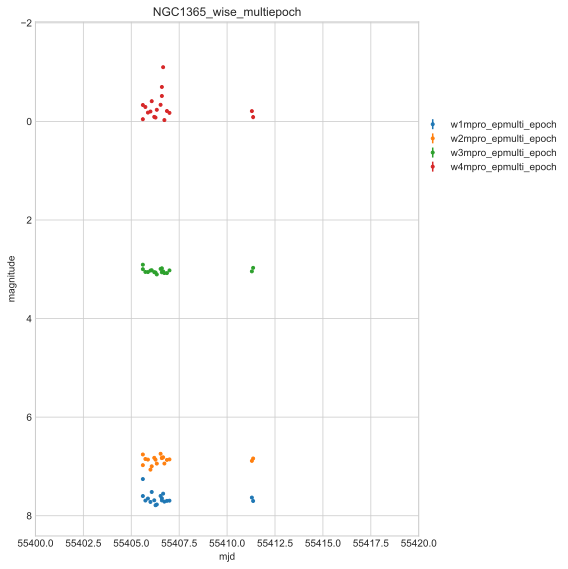

In [42]:
fig, axs = plt.subplots(1, 1,figsize=(8,8))
axs.set_title('NGC1365_wise_multiepoch')

for i in range(4):
    name_mjd='mjd'
    name_band=data_allwise_epoch.columns[i*3+8]
    name_err=data_allwise_epoch.columns[i*3+9]
    print(name_mjd,name_band,name_err)
    data_band=data_allwise_epoch[data_allwise_epoch[name_mjd].notnull()]  
    axs.errorbar(data_band[name_mjd],data_band[name_band],data_band[name_err],fmt='.',label=name_band+'multi_epoch')
    mag_wise_data=pd.DataFrame({'t':data_band[name_mjd],'flux':data_band[name_band],'err':data_band[name_err]},index=None,columns=['t','flux','err'])
    mag_wise_data.to_csv('/Users/brettlv/Downloads/NGC1365/mag_wise_multi_%s_data.csv'%name_band,index=False,header=False)
    dcf_wise_data=pd.DataFrame({'t':data_band[name_mjd],'flux':(-48.6-data_band[name_band])/2.5,'err':data_band[name_err]/2.5},index=None,columns=['t','flux','err'])
    dcf_wise_data.to_csv('/Users/brettlv/Downloads/NGC1365/dcf_wise_multi_%s_data.csv'%name_band,index=False,header=False)

axs.legend(loc=[1.0,0.7])
axs.invert_yaxis()
  
axs.set_ylabel('magnitude')
axs.set_xlabel('mjd')
#axs.set_xlim(55400,55420)
timerangel,timeranger=(55400,55420)
axs.set_xlim(timerangel,timeranger)

plt.tight_layout()
plt.savefig('/Users/brettlv/Downloads/NGC1365/wise_multi_epoch_lc_%d-%d.png'%(timerangel,timeranger),dpi=400)


# XRT

In [38]:
data_xrt_pc = pd.read_table("/Users/brettlv/Downloads/NGC1365/USERPROD_1623/lc/curve_plain.dat",skiprows=range(14))  

/Users/brettlv/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  if __name__ == '__main__':


In [39]:
data_xrt_pc.columns=['mjd', 'T_+ve   ', 'T_-ve   ', 'Rate', 'Ratepos', 'Rateneg']

mjd w1mpro_ep w1sigmpro_ep
mjd w2mpro_ep w2sigmpro_ep
mjd w3mpro_ep w3sigmpro_ep
mjd w4mpro_ep w4sigmpro_ep
mjd w1mpro w1sigmpro
mjd w2mpro w2sigmpro
mjd w1mpro_allwise w1sigmpro_allwise
mjd w2mpro_allwise w2sigmpro_allwise
mjd w3mpro_allwise w3sigmpro_allwise
mjd w4mpro_allwise w4sigmpro_allwise


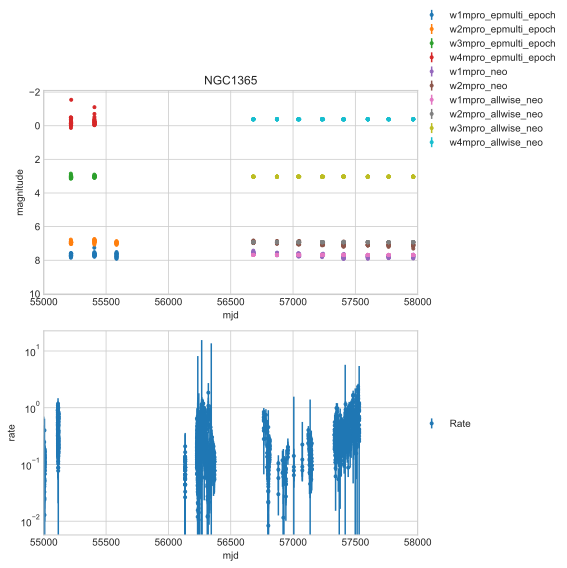

In [43]:
fig, axs = plt.subplots(2, 1,figsize=(8,8))
axs[0].set_title('NGC1365')


for i in range(4):
    name_mjd='mjd'
    name_band=data_allwise_epoch.columns[i*3+8]
    name_err=data_allwise_epoch.columns[i*3+9]
    print(name_mjd,name_band,name_err)
    data_band=data_allwise_epoch[data_allwise_epoch[name_mjd].notnull()]  
    axs[0].errorbar(data_band[name_mjd],data_band[name_band],data_band[name_err],fmt='.',label=name_band+'multi_epoch')
    mag_wise_data=pd.DataFrame({'t':data_band[name_mjd],'flux':data_band[name_band],'err':data_band[name_err]},index=None,columns=['t','flux','err'])
    
    #mag_wise_data.to_csv('/Users/brettlv/Downloads/NGC1365/mag_wise_multi_%s_data.csv'%name_band,index=False,header=False)

    dcf_wise_data=pd.DataFrame({'t':data_band[name_mjd],'flux':(-48.6-data_band[name_band])/2.5,'err':data_band[name_err]/2.5},index=None,columns=['t','flux','err'])
    
    #dcf_wise_data.to_csv('/Users/brettlv/Downloads/NGC1365/dcf_wise_multi_%s_data.csv'%name_band,index=False,header=False)

    
data_neowise_select=data_neowise.loc[:, ['w1mpro', 'w1sigmpro',
         'w2mpro', 'w2sigmpro','w1mpro_allwise', 'w1sigmpro_allwise', 'w2mpro_allwise',
        'w2sigmpro_allwise', 'w3mpro_allwise', 'w3sigmpro_allwise',
        'w4mpro_allwise', 'w4sigmpro_allwise']]

for i in range(6):
    name_mjd='mjd'
    name_band=data_neowise_select.columns[i*2]
    name_err=data_neowise_select.columns[i*2+1]
    print(name_mjd,name_band,name_err)
    axs[0].errorbar(data_neowise[name_mjd],data_neowise_select[name_band],data_neowise_select[name_err],fmt='.',label=name_band+'_neo') 
    mag_neowise_data=pd.DataFrame({'t':data_neowise[name_mjd],'flux':data_neowise[name_band],'err':data_neowise[name_err]},index=None,columns=['t','flux','err'])
    #mag_neowise_data.to_csv('/Users/brettlv/Downloads/NGC1365/mag_neowise_%s_data.csv'%name_band,index=False,header=False)    
    dcf_neowise_data=pd.DataFrame({'t':data_neowise[name_mjd],'flux':(-48.5-data_neowise[name_band])/2.5,'err':data_neowise[name_err]/2.5},index=None,columns=['t','flux','err'])
    #dcf_neowise_data.to_csv('/Users/brettlv/Downloads/NGC1365/dcf_neowise_%s_data.csv'%name_band,index=False,header=False)
    
    
    
axs[0].legend(loc=[1.0,0.7])
axs[0].invert_yaxis()
  
axs[0].set_ylabel('magnitude')
axs[0].set_xlabel('mjd')


name_band='xrt_pc'
lower_error = -data_xrt_pc['Rateneg']
upper_error = data_xrt_pc['Ratepos']
asymmetric_error = [lower_error, upper_error]


xrt_pc_data=pd.DataFrame({'t':data_xrt_pc['mjd'],'flux':data_xrt_pc['Rate'],'err':data_xrt_pc['Ratepos']},index=None,columns=['t','flux','err'])
xrt_pc_data.to_csv('/Users/brettlv/Downloads/NGC1365/xrt_pc_data.csv',index=False,header=False)
axs[1].errorbar(data_xrt_pc['mjd'],data_xrt_pc['Rate'],yerr=asymmetric_error,fmt='.')


timerangel,timeranger=(55000,58000)
axs[0].set_xlim(timerangel,timeranger)
axs[1].set_xlim(timerangel,timeranger)
axs[1].legend(loc=[1.0,0.5])

  
axs[1].set_ylabel('rate')
axs[1].set_xlabel('mjd')

axs[1].semilogy()
plt.tight_layout()
plt.savefig('/Users/brettlv/Downloads/NGC1365/wise_xrt_pc_lc%d-%d.png'%(timerangel,timeranger),dpi=400)
